### **'Loan Eligibility Prediction'**

In real life , the problme of loan eligibility prediction is crucial for both lenders and borrowers. For lenders, accurately assesssing the rish associated with each loan application is essential for making informed decision and minimizing financial losses due to defuats. On the other hand for borrowers, access credit can significantly impact their ability to achieve financial goal sunch as buying a home, starting a business or pursiing higher education.


The important of this problme lies in its direct impact on induvidual's financial well-being and the stability of financial institutions. Inaccurate or biased loan eligibility predictions can lead to unfair lending pratices, discrimination and economic.


Therefore, Developing reliable and fair loan eligible prediction models is essential for promoting financial inclusion, reducing credit risk and fostering a healthy economy.

Link Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Year 3\Samester 02\Machine Learning TP\TP03\Loan Eligible Prediction\loan-train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1. **Loan_ID**: This column contains unique identifiers for each loan application. It is used to uniquely identify each record in the dataset.

2. **Gender**: This column represents the gender of the applicant, where 'Male' indicates male applicants and 'Female' indicates female applicants.

3. **Married**: This column indicates whether the applicant is married or not. 'Yes' means the applicant is married, and 'No' means the applicant is not married.

4. **Dependents**: This column indicates the number of dependents (e.g., children, elderly parents) the applicant has. It typically includes categories such as '0', '1', '2', '3+', representing the number of dependents.

5. **Education**: This column indicates the educational qualification of the applicant, where 'Graduate' indicates the applicant is a graduate and 'Not Graduate' indicates the applicant is not a graduate.

6. **Self_Employed**: This column indicates whether the applicant is self-employed or not. 'Yes' means the applicant is self-employed, and 'No' means the applicant is not self-employed.

7. **ApplicantIncome**: This column represents the income of the applicant.

8. **CoapplicantIncome**: This column represents the income of the co-applicant (if any) who is applying for the loan with the primary applicant.

9. **LoanAmount**: This column represents the amount of the loan applied for by the applicant.

10. **Loan_Amount_Term**: This column represents the term (duration) of the loan in months.

11. **Credit_History**: This column indicates the credit history of the applicant, where '1' means the applicant has a credit history, and '0' means the applicant does not have a credit history.

12. **Property_Area**: This column represents the location of the property for which the loan is being applied. It typically includes categories such as 'Rural', 'Semiurban', and 'Urban'.

13. **Loan_Status**: This column indicates whether the loan application was approved or not. 'Y' means the loan was approved, and 'N' means the loan was not approved.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Step 01: Data Preprocessing**

In [6]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1. **SimpleImputer**: This class from `sklearn.impute` provides a simple strategy for imputing missing values in a dataset. Missing values can be replaced with a constant value (like 0), the mean, median, or most frequent value along each column. It helps handle missing data before feeding it to machine learning algorithms.

2. **OneHotEncoder**: This class from `sklearn.preprocessing` is used for one-hot encoding categorical features. Categorical variables are typically encoded as integers before being fed into machine learning algorithms, but this can introduce unintended ordinality. One-hot encoding transforms categorical variables into a binary matrix where each category becomes a separate binary feature.

3. **StandardScaler**: This class from `sklearn.preprocessing` is used for standardizing features by removing the mean and scaling to unit variance. Standardization is a common preprocessing step in machine learning workflows, as it helps to center the data around 0 and scale it to have a standard deviation of 1. This ensures that features are on a similar scale, which can be important for some algorithms.

4. **ColumnTransformer**: This class from `sklearn.compose` allows for applying different transformations to different columns or subsets of columns in a dataset. It is particularly useful when you have a mix of numerical and categorical features that require different preprocessing steps. `ColumnTransformer` enables you to create a preprocessing pipeline that handles each type of feature appropriately.

5. **Pipeline**: This class from `sklearn.pipeline` is used to sequentially apply a list of transformations to the data. It chains together multiple processing steps, such as imputation, encoding, and scaling, into a single object. `Pipeline` provides a convenient way to encapsulate the preprocessing steps and the model training step into a single entity, making the workflow more manageable and less error-prone.


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Step 1: Define preprocessing steps
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 2: Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Step 4: Convert processed_data back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()))

# Step 5: Add the target variable 'Loan_Status' to the DataFrame
processed_df['Loan_Status'] = df['Loan_Status']

# Step 6: Save the processed data to a CSV file
processed_df.to_csv('cleanData.csv', index=False)

# Check if the file is saved successfully
print("Processed data saved to 'cleanData.csv'")


Processed data saved to 'cleanData.csv'


In [9]:
processed_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,x0_Female,x0_Male,x1_No,x1_Yes,x2_0,x2_1,...,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x5_0.0,x5_1.0,x6_Rural,x6_Semiurban,x6_Urban,Loan_Status
0,0.072991,-0.554487,-0.211241,0.273231,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y
1,-0.134412,-0.038732,-0.211241,0.273231,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,N
2,-0.393747,-0.554487,-0.948996,0.273231,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Y
3,-0.462062,0.251980,-0.306435,0.273231,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y
4,0.097728,-0.554487,-0.056551,0.273231,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y


**Step 02: EDA(Exploritory Data Analysis)**

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots

# Define the list of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Create subplots for each categorical feature
fig = make_subplots(rows=2, cols=3, subplot_titles=categorical_features)

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    counts = df[feature].value_counts().reset_index()
    counts.columns = [feature, 'count']
    fig.add_trace(px.bar(counts, x=feature, y='count').data[0], row=(i // 3) + 1, col=(i % 3) + 1)

# Update layout
fig.update_layout(title='Count of Categorical Features', showlegend=False)
fig.show()


In [11]:
# Define the list of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Plot grouped bar plots for each categorical feature with Loan_Status
for feature in categorical_features:
    counts = df.groupby([feature, 'Loan_Status']).size().reset_index(name='count')
    fig = px.bar(counts, x=feature, y='count', color='Loan_Status', barmode='group', 
                 labels={'count': 'Count', 'Loan_Status': 'Loan Status'}, 
                 title=f'Count of Loan Status by {feature}')
    fig.show()


In [12]:
print("Summary Statistics for ApplicantIncome:")
print(df['ApplicantIncome'].describe())


Summary Statistics for ApplicantIncome:
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


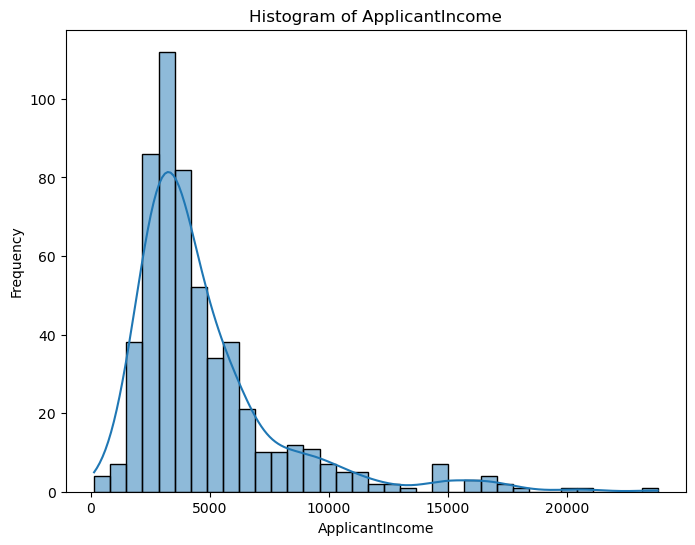

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()


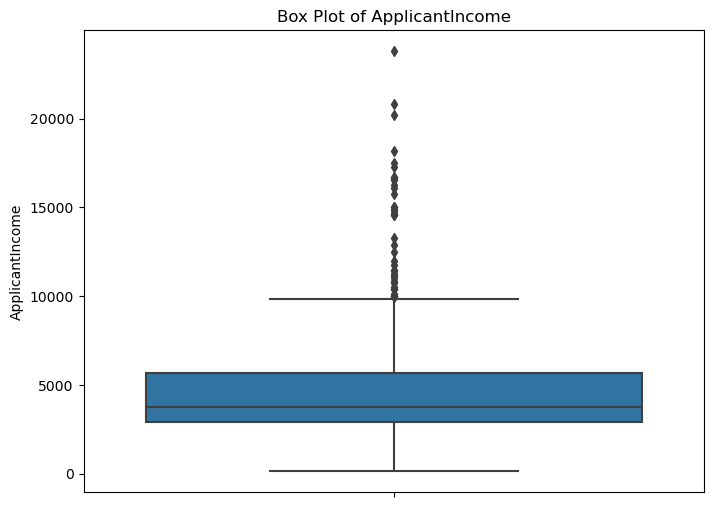

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ApplicantIncome'])
plt.title('Box Plot of ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.show()


In [36]:
print("Summary Statistics for CoapplicantIncome:")
print(df['CoapplicantIncome'].describe())


Summary Statistics for CoapplicantIncome:
count     559.000000
mean     1415.797710
std      1663.828279
min         0.000000
25%         0.000000
50%      1213.000000
75%      2250.000000
max      8333.000000
Name: CoapplicantIncome, dtype: float64


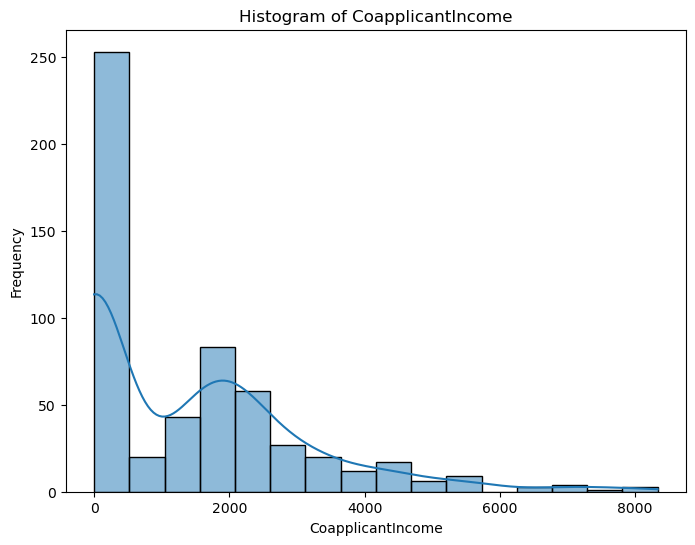

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Histogram of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.show()


In [15]:
print("Summary Statistics for LoanAmount:")
print(df['LoanAmount'].describe())


Summary Statistics for LoanAmount:
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


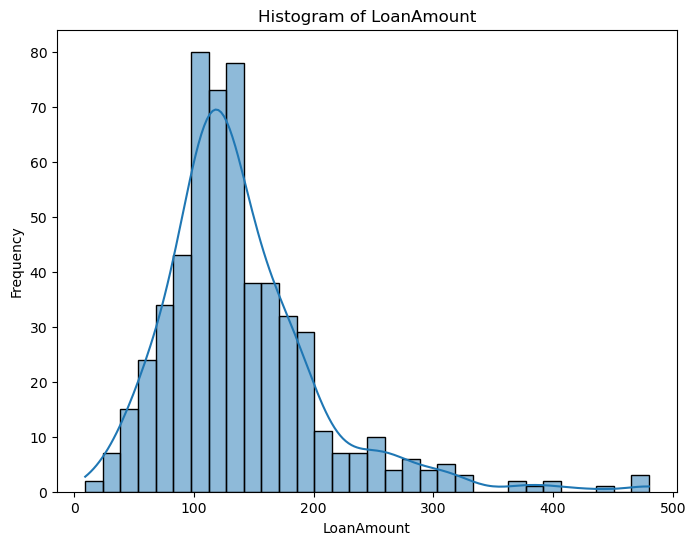

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()


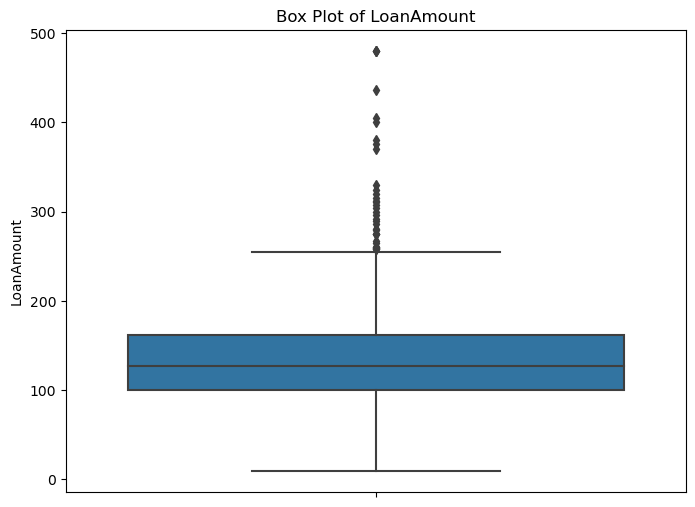

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LoanAmount'])
plt.title('Box Plot of LoanAmount')
plt.ylabel('LoanAmount')
plt.show()


In [18]:
print("Summary Statistics for Loan_Amount_Term:")
print(df['Loan_Amount_Term'].describe())


Summary Statistics for Loan_Amount_Term:
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


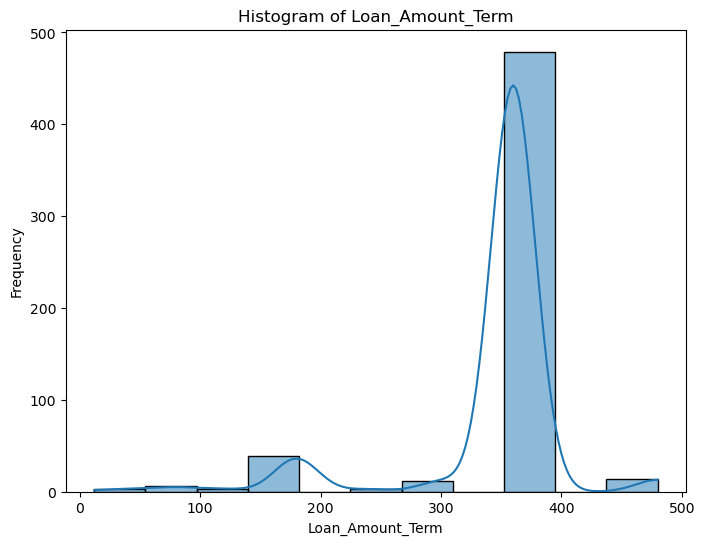

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title('Histogram of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.show()


In [21]:
# Define the numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Remove outliers above the 99th percentile for each numerical column
for feature in numerical_features:
    percentile_99 = df[feature].quantile(0.99)
    df = df[df[feature] <= percentile_99]

# Now you can perform EDA on the updated dataframe without outliers


In [22]:
# Combine numerical and categorical features
all_features = numerical_features + categorical_features

# Summary statistics after removing outliers
print("Summary Statistics after Removing Outliers:")
print(df[all_features].describe())


Summary Statistics after Removing Outliers:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       559.000000         559.000000  559.000000        559.000000
mean       4790.948122        1415.797710  139.155635        342.397138
std        3227.833035        1663.828279   66.655718         65.129425
min         150.000000           0.000000    9.000000         12.000000
25%        2891.500000           0.000000  100.000000        360.000000
50%        3750.000000        1213.000000  127.000000        360.000000
75%        5686.000000        2250.000000  162.000000        360.000000
max       23803.000000        8333.000000  480.000000        480.000000


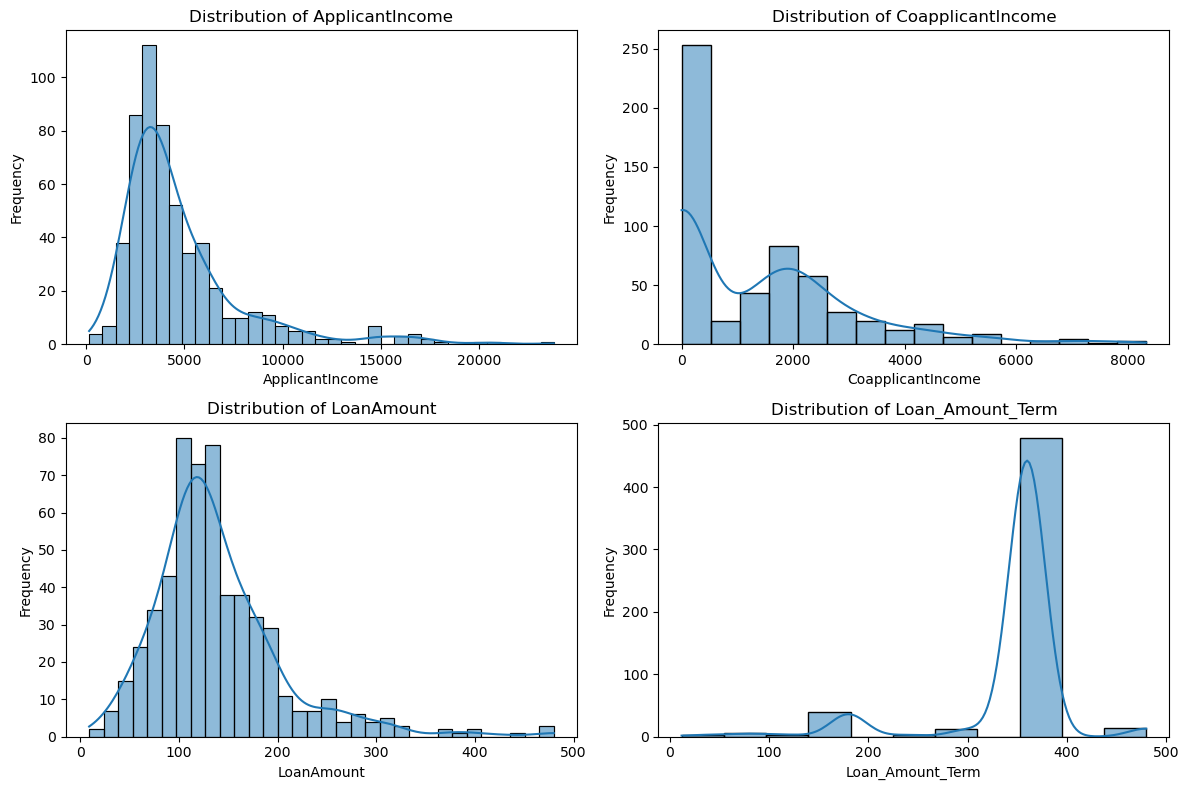

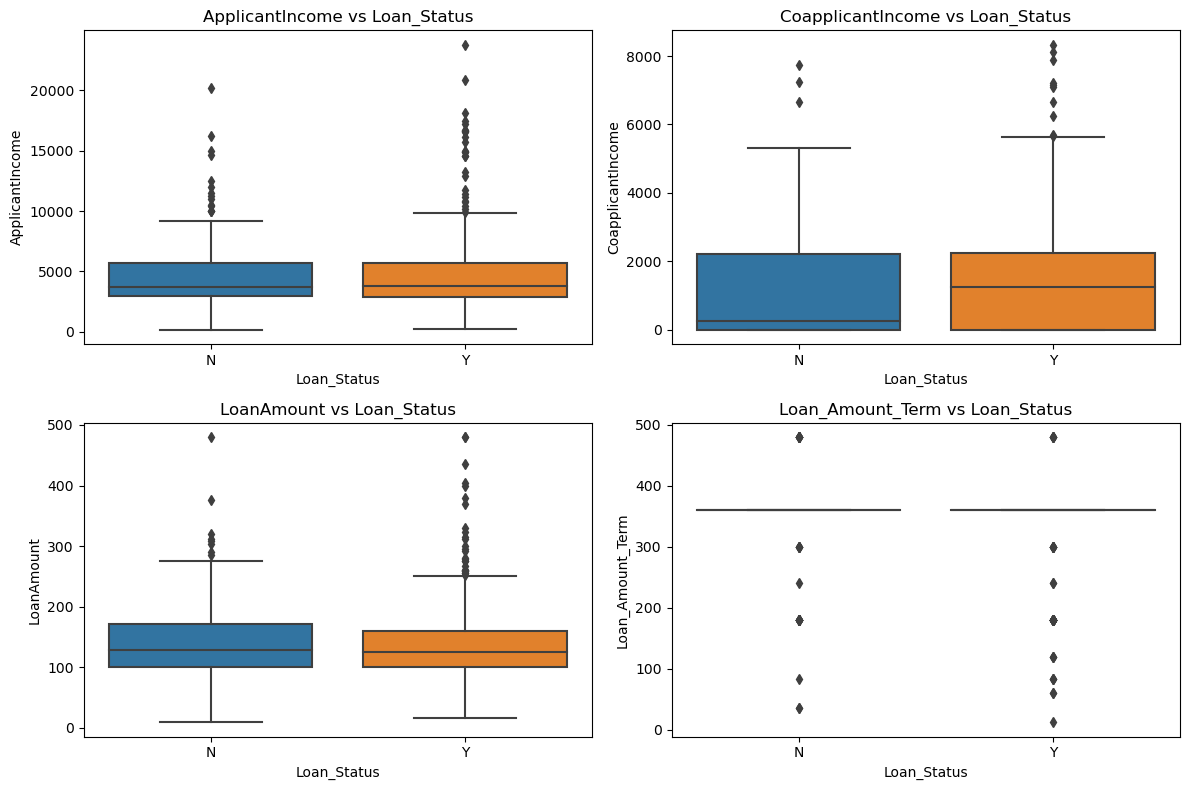

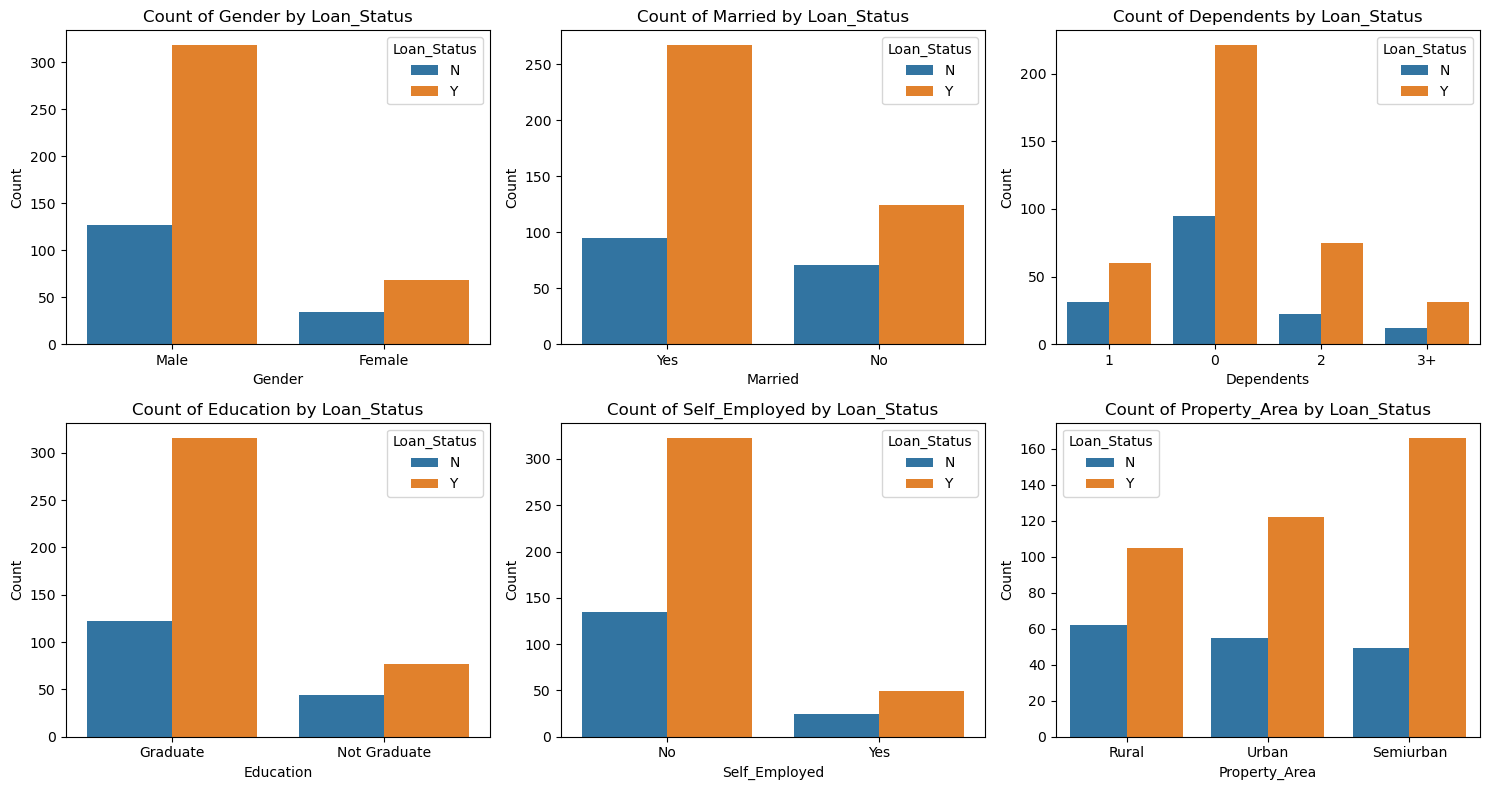

In [23]:

# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df['Loan_Status'], y=df[feature])
    plt.title(f'{feature} vs Loan_Status')
    plt.xlabel('Loan_Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Visualize the count of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Loan_Status')
    plt.title(f'Count of {feature} by Loan_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [24]:
# Save the processed DataFrame to a CSV file
processed_df.to_csv('cleandata.csv', index=False)

# Check if the file is saved successfully
print("Processed data saved to 'cleandata.csv'")


Processed data saved to 'cleandata.csv'


# Building Logistic Regression Model 

In [25]:
# Step 1: Load the preprocessed data from the CSV file
processed_df = pd.read_csv('cleandata.csv')

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define the LogisticRegression class
class LogisticRegression:
    def __init__(self, lr=0.1, max_iter=5000):
        self.lr = lr
        self.max_iter = max_iter
        self.weight = None
        self.bias = None
        self.cost = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y):
        m = len(y)
        z = np.dot(X, self.weight) + self.bias
        h = self.sigmoid(z)
        cost = -1 / m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
        return cost
    
    def fit(self, X, y):
        m, n = X.shape
        self.weight = np.zeros(n)
        self.bias = 0

        for i in range(self.max_iter + 1):
            z = np.dot(X, self.weight) + self.bias
            h = self.sigmoid(z)
            grad_w = 1 / m * np.dot(X.T, y - h)
            grad_b = 1 / m * np.sum(y - h)

            self.weight += self.lr * grad_w
            self.bias += self.lr * grad_b

            c = self.cost_function(X, y)
            self.cost.append(c)

            final_weight = self.weight.tolist()
            final_bias = self.weight.tolist()

            if i % 1000 == 0:
                print(f"Iteration {i}: Cost = {c}, Weight = {final_weight}, Bias = {final_bias}")

    def predict(self, X):
        z = np.dot(X, self.weight) + self.bias
        h = self.sigmoid(z)
        predictions = [1 if p >= 0.5 else 0 for p in h]
        return predictions

# Load your processed data
processed_df = pd.read_csv('cleandata.csv') # Replace "processed_data.csv" with the actual file path

# Define the features (X) and target variable (y)
X = processed_df.drop(columns=['Loan_Status'])  # Features
y = processed_df['Loan_Status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train_encoded)




Iteration 0: Cost = 0.6697069541617598, Weight = [-0.0006142720086957966, -0.0029136076273427684, -0.0013174287732105583, -0.0009510229838187123, 0.0035641547861507126, 0.016089613034623217, 0.004786150712830957, 0.014867617107942972, 0.011507128309572302, 0.002138492871690428, 0.004276985743380856, 0.001731160896130346, 0.016496945010183298, 0.003156822810590631, 0.016904276985743382, 0.0027494908350305497, -0.005906313645621181, 0.02556008146639511, 0.0035641547861507126, 0.01109979633401222, 0.004989816700610997], Bias = [-0.0006142720086957966, -0.0029136076273427684, -0.0013174287732105583, -0.0009510229838187123, 0.0035641547861507126, 0.016089613034623217, 0.004786150712830957, 0.014867617107942972, 0.011507128309572302, 0.002138492871690428, 0.004276985743380856, 0.001731160896130346, 0.016496945010183298, 0.003156822810590631, 0.016904276985743382, 0.0027494908350305497, -0.005906313645621181, 0.02556008146639511, 0.0035641547861507126, 0.01109979633401222, 0.00498981670061099

In [60]:
processed_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_0',
       'x2_1', 'x2_2', 'x2_3+', 'x3_Graduate', 'x3_Not Graduate', 'x4_No',
       'x4_Yes', 'x5_0.0', 'x5_1.0', 'x6_Rural', 'x6_Semiurban', 'x6_Urban',
       'Loan_Status'],
      dtype='object')

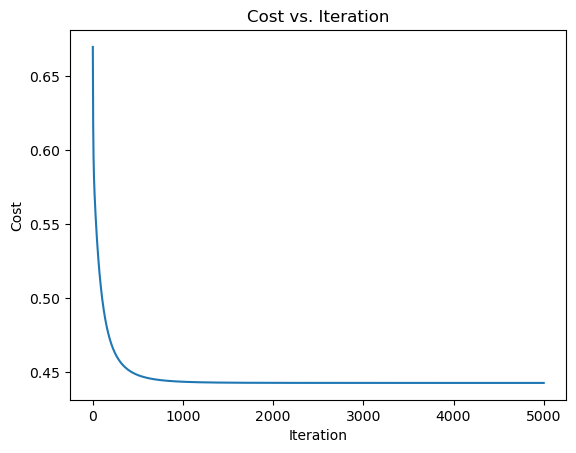

In [65]:
plt.plot(range(len(model.cost)), model.cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

In [54]:
# Step 5: Make predictions on the testing data
y_pred_numeric = model.predict(X_test)

# Map numeric labels to string labels
label_mapping = {0: 'N', 1: 'Y'}
y_pred = np.array([label_mapping[label] for label in y_pred_numeric])

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6504065040650406


# Implement Model

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [57]:

# Step 1: Load the preprocessed data from the CSV file
processed_df = pd.read_csv('cleandata.csv')

# Step 2: Define the features (X) and target variable (y)
X = processed_df.drop(columns=['Loan_Status'])  # Features
y = processed_df['Loan_Status']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7886178861788617


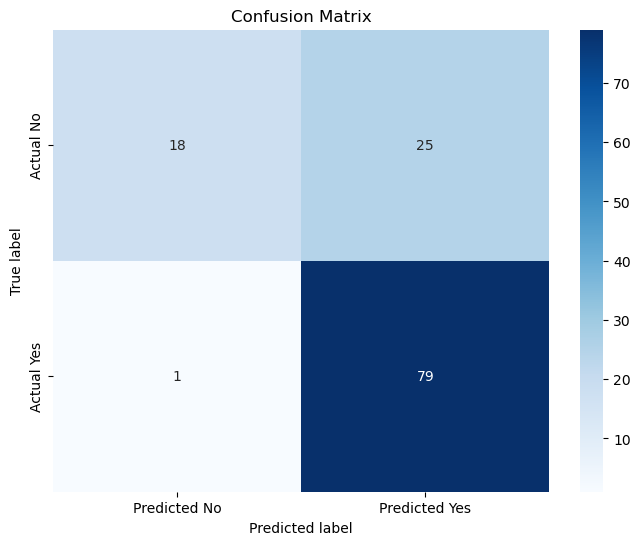

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Report Summarize")
print(report)


Report Summarize
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

